<a href="https://colab.research.google.com/github/ahan02/Basic-Time-Series-and-Forecasting/blob/master/DSW_2020_Intro_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Data Science

## What Libraries?

#### Pandas is a package in Python that helps to handle lots of data. It helps to sort and clean the data.


> From Pands documentation: https://pypi.org/project/pandas/

##### Some highlights:

- Easy handling of **missing data** (represented as NaN) in floating point as well as non-floating point data
- Size mutability: columns can be **inserted and deleted** from DataFrame and higher dimensional objects
- Intelligent **label-based slicing**, **fancy indexing**, and **subsetting** of large data sets
- Intuitive **merging** and **joining** data sets
- Flexible **reshaping** and **pivoting** of data sets


#### Numpy is a package that defines a multi-dimensional array object. 

> From Numpy documentation: https://pypi.org/project/numpy/


#### maplotlib produces quality 2D graphics

> From matplotlib documentation: https://pypi.org/project/matplotlib/

#### seaborn is a library for making statistical graphics

> From seaborn documentation: https://pypi.org/project/seaborn/

Let's get started with a sample data

In [1]:
import pandas as pd # the pd is by convention
import numpy as np # as is the np

import matplotlib.pyplot as plt
import seaborn as sns

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

A Dataframe is essentially a table, like shown below

### Reading Data

Data Description: 

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

Data obtained from data.gov
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data


##### To begin with, we're going to read in some data from a CSV

In [8]:
import pandas as pd
url="https://raw.githubusercontent.com/ahan02/Data-Science-Hackathon-Workshop-at-UKC/master/data/train.csv"
sample = pd.read_csv(url,index_col=0)
sample.head()

MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition SalePrice
Id                                    ...                                  
1           60       RL         65.0  ...        WD        Normal    208500
2           20       RL         80.0  ...        WD        Normal    181500
3           60       RL         68.0  ...        WD        Normal    223500
4           70       RL         60.0  ...        WD       Abnorml    140000
5           60       RL         84.0  ...        WD        Normal    250000

[5 rows x 80 columns]

In [ ]:
sample.tail()

MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition SalePrice
Id                                      ...                                  
1456          60       RL         62.0  ...        WD        Normal    175000
1457          20       RL         85.0  ...        WD        Normal    210000
1458          70       RL         66.0  ...        WD        Normal    266500
1459          20       RL         68.0  ...        WD        Normal    142125
1460          20       RL         75.0  ...        WD        Normal    147500

[5 rows x 80 columns]

Let's use a Pandas built-in function to learn more about our data.

In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
sample.describe()

MSSubClass  LotFrontage  ...       YrSold      SalePrice
count  1460.000000  1201.000000  ...  1460.000000    1460.000000
mean     56.897260    70.049958  ...  2007.815753  180921.195890
std      42.300571    24.284752  ...     1.328095   79442.502883
min      20.000000    21.000000  ...  2006.000000   34900.000000
25%      20.000000    59.000000  ...  2007.000000  129975.000000
50%      50.000000    69.000000  ...  2008.000000  163000.000000
75%      70.000000    80.000000  ...  2009.000000  214000.000000
max     190.000000   313.000000  ...  2010.000000  755000.000000

[8 rows x 37 columns]

In [ ]:
sample.shape

(1460, 80)

Great, looks like these are all behaving relatively as expected! That's lovely. 

### Getting data from the dataframe

Now let's learn how to grab some data from the DataFrame. 

In [ ]:
sample['YearBuilt'].head()

Id
1    2003
2    1976
3    2001
4    1915
5    2000
Name: YearBuilt, dtype: int64

In [ ]:
sample['SalePrice']

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
sample['SalePrice'].value_counts()

140000    20
135000    17
145000    14
155000    14
190000    13
          ..
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64

**Exercise 1:**

Using the dataframe, figure out about the distribution of the Sale price by sale condition and bedroom above ground 

In [ ]:
sample.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [ ]:
sample.groupby(['SalePrice', 'SaleCondition']).size()

SalePrice  SaleCondition
34900      Abnorml          1
35311      Abnorml          1
37900      Abnorml          1
39300      Normal           1
40000      Normal           1
                           ..
582933     Partial          1
611657     Partial          1
625000     Normal           1
745000     Abnorml          1
755000     Normal           1
Length: 778, dtype: int64

In [ ]:
g = sample.groupby(['SalePrice', 'BedroomAbvGr'])
size = g.size()
size[size > 5]

SalePrice  BedroomAbvGr
100000     2                6
110000     2                7
115000     3                7
125000     3                6
127000     3                6
129000     3                7
130000     3                9
135000     3                8
139000     3                7
140000     2                8
           3                8
145000     3                9
155000     3               11
160000     3                8
165000     3                6
175000     3                9
178000     3                7
180000     3                7
190000     3                6
215000     3                6
dtype: int64

In [ ]:
# Subsetting
newsample=sample[['SalePrice', 'BedroomAbvGr']]
newsample

SalePrice  BedroomAbvGr
Id                           
1        208500             3
2        181500             3
3        223500             3
4        140000             3
5        250000             4
...         ...           ...
1456     175000             3
1457     210000             3
1458     266500             4
1459     142125             2
1460     147500             3

[1460 rows x 2 columns]

We'll use `.idxmin` to do the job. It will return the first occurrence of minimum value

In [ ]:
newsample.loc[newsample['BedroomAbvGr'].idxmin()]

SalePrice       385000
BedroomAbvGr         0
Name: 54, dtype: int64

### Row Lookups

We'll use `.iloc` to do the job. Let's demonstrate by grabbing the first (0th) row.

In [ ]:
newsample.iloc[0]

SalePrice       208500
BedroomAbvGr         3
Name: 1, dtype: int64

In [ ]:
sample.iloc[0]

MSSubClass           60
MSZoning             RL
LotFrontage          65
LotArea            8450
Street             Pave
                  ...  
MoSold                2
YrSold             2008
SaleType             WD
SaleCondition    Normal
SalePrice        208500
Name: 1, Length: 80, dtype: object

return multiple rows by following Python's conventions like so:

In [ ]:
newsample.iloc[0:3]

SalePrice  BedroomAbvGr
Id                         
1      208500             3
2      181500             3
3      223500             3

In [ ]:
sample.iloc[0:3]

MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition SalePrice
Id                                    ...                                  
1           60       RL         65.0  ...        WD        Normal    208500
2           20       RL         80.0  ...        WD        Normal    181500
3           60       RL         68.0  ...        WD        Normal    223500

[3 rows x 80 columns]

Note:iloc means "index location" 

### Filtering

Now we want to filter the data so we only see rows that match a certain criteria. If condition criter is met, it will show true and if not, mark it as a false.

In [ ]:
newerhomes = (sample['YearBuilt'] > 2000) 
newerhomes

Id
1        True
2       False
3        True
4       False
5       False
        ...  
1456    False
1457    False
1458    False
1459    False
1460    False
Name: YearBuilt, Length: 1460, dtype: bool

In [ ]:
sample.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [ ]:
largerhomes = (sample['BedroomAbvGr'] > 4) 
largerhomes

Id
1       False
2       False
3       False
4       False
5       False
        ...  
1456    False
1457    False
1458    False
1459    False
1460    False
Name: BedroomAbvGr, Length: 1460, dtype: bool

Now we apply the largerhomes and should see that only rows with that condition!

In [ ]:
sample_test = sample[largerhomes] 
sample_test
#sample_test.head()

MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition SalePrice
Id                                      ...                                  
119           60       RL         90.0  ...        WD        Normal    320000
138           90       RL         82.0  ...        WD        Family    171000
145           90       RM         70.0  ...     ConLI       Abnorml    125000
199           75       RM         92.0  ...        WD       Abnorml    104000
292          190       RL         55.0  ...        WD        Normal    135900
325           80       RL         96.0  ...        WD        Normal    242000
329           75       RL          NaN  ...        WD        Normal    214500
331           90       RL          NaN  ...        WD        Normal    119000
387           50       RL         58.0  ...        WD       AdjLand     81000
571           90       RL         74.0  ...        WD        Normal    142600
629           60       RL         70.0  ...        WD        Family    135000
636          190       RH         60.0  ...        WD       Abnorml    200000
790           60       RL          NaN  ...        WD        Normal    187500
844           90       RL         80.0  ...        WD        Normal    141000
849           50       RL         75.0  ...        WD        Normal    240000
884           75       RL         60.0  ...        WD        Normal    118500
898           90       RL         64.0  ...        WD        Alloca    142953
911           90       RL         80.0  ...        WD        Normal    154300
1031         190       RH          NaN  ...        WD        Normal    160000
1032          75       RL        102.0  ...        WD        Normal    197000
1033          60       RL          NaN  ...        WD       Abnorml    310000
1063         190       RM         85.0  ...        WD        Normal     90000
1069         160       RM         42.0  ...        WD        Normal    151400
1133          70       RM         90.0  ...        WD        Normal    117500
1263          50       RL          NaN  ...        WD        Normal    161500
1329          50       RM         60.0  ...        WD        Normal    256000
1351          90       RL         91.0  ...        WD        Normal    200000
1387          60       RL         80.0  ...        WD        Normal    250000
1388          50       RM         60.0  ...       CWD        Family    136000

[29 rows x 80 columns]

Multiple condition? no issues

In [ ]:
test = (sample['BedroomAbvGr'] > 4) & (sample['YearBuilt'] ==1973)
sample[test]

MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition SalePrice
Id                                      ...                                  
1069         160       RM         42.0  ...        WD        Normal    151400

[1 rows x 80 columns]

**Exercise 2:**

Subset sale price with full bath (#), and find the lowest sales price of the house, also return # of the full bath

In [ ]:
# Hint: create a filter called mask, then apply it to the dataframe

In [ ]:
# Subsetting
newsample=sample[['SalePrice', 'FullBath']]
newsample

SalePrice  FullBath
Id                       
1        208500         2
2        181500         2
3        223500         2
4        140000         1
5        250000         2
...         ...       ...
1456     175000         2
1457     210000         2
1458     266500         2
1459     142125         1
1460     147500         1

[1460 rows x 2 columns]

In [ ]:
newsample.loc[newsample['SalePrice'].idxmin()]

SalePrice    34900
FullBath         1
Name: 496, dtype: int64

### Doing Stats with Pandas

Let's do some summary statistics

In [ ]:
sample['SalePrice'].mean()

180921.19589041095

Or we could find the max or min 

In [ ]:
print(sample['SalePrice'].max())

755000


In [ ]:
print(sample['SalePrice'].min())

34900


### Making new columns

Pandas also allows us to create columns that are mixtures of other columns. Let's make a column that is "visibility as a percentage of the maximum visibility".

In [ ]:
sample.head(3)

MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition SalePrice
Id                                    ...                                  
1           60       RL         65.0  ...        WD        Normal    208500
2           20       RL         80.0  ...        WD        Normal    181500
3           60       RL         68.0  ...        WD        Normal    223500

[3 rows x 80 columns]

In [ ]:
#drop rows
newdf=sample[1:6]
newdf

MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition SalePrice
Id                                    ...                                  
2           20       RL         80.0  ...        WD        Normal    181500
3           60       RL         68.0  ...        WD        Normal    223500
4           70       RL         60.0  ...        WD       Abnorml    140000
5           60       RL         84.0  ...        WD        Normal    250000
6           50       RL         85.0  ...        WD        Normal    143000

[5 rows x 80 columns]

In [ ]:
#drop columns
newdf2=sample.drop(columns=["Street"])
newdf2

MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition SalePrice
Id                                      ...                                  
1             60       RL         65.0  ...        WD        Normal    208500
2             20       RL         80.0  ...        WD        Normal    181500
3             60       RL         68.0  ...        WD        Normal    223500
4             70       RL         60.0  ...        WD       Abnorml    140000
5             60       RL         84.0  ...        WD        Normal    250000
...          ...      ...          ...  ...       ...           ...       ...
1456          60       RL         62.0  ...        WD        Normal    175000
1457          20       RL         85.0  ...        WD        Normal    210000
1458          70       RL         66.0  ...        WD        Normal    266500
1459          20       RL         68.0  ...        WD        Normal    142125
1460          20       RL         75.0  ...        WD        Normal    147500

[1460 rows x 79 columns]

In [ ]:
sample['Compare_years'] = sample['YearRemodAdd']-sample['YearBuilt']
sample

MSSubClass MSZoning  LotFrontage  ...  SaleCondition SalePrice Compare_years
Id                                      ...                                       
1             60       RL         65.0  ...         Normal    208500             0
2             20       RL         80.0  ...         Normal    181500             0
3             60       RL         68.0  ...         Normal    223500             1
4             70       RL         60.0  ...        Abnorml    140000            55
5             60       RL         84.0  ...         Normal    250000             0
...          ...      ...          ...  ...            ...       ...           ...
1456          60       RL         62.0  ...         Normal    175000             1
1457          20       RL         85.0  ...         Normal    210000            10
1458          70       RL         66.0  ...         Normal    266500            65
1459          20       RL         68.0  ...         Normal    142125            46
1460          20       RL         75.0  ...         Normal    147500             0

[1460 rows x 81 columns]

In [ ]:
##check nulls in the data

sample.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Compare_years      0
Length: 81, dtype: int64

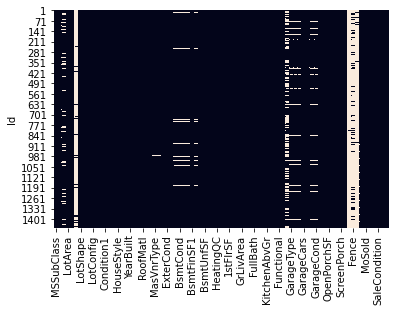

In [ ]:
#map missing values

sns.heatmap(sample.isnull(), cbar=False)

### Plotting with Pandas

The last part of pandas we want to explore today is some of it's built in plotting features. let's plot histogram

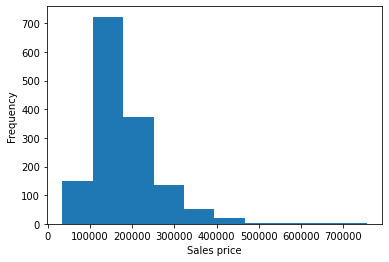

In [ ]:
sample['SalePrice'].plot.hist()
plt.xlabel("Sales price");

**Exercise 3**

Plot a histogram of other columns e.g. 'All Ages, 2012'

In [ ]:
# Hint: plot.hist(), plot.line()

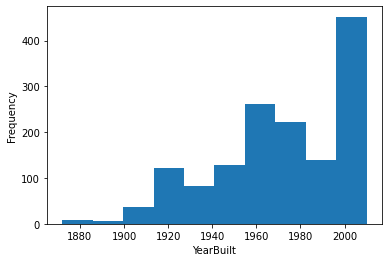

In [ ]:
sample['YearBuilt'].plot.hist()
plt.xlabel("YearBuilt");

In [ ]:
new_sample=sample[['SalePrice','YearBuilt', 'FullBath', 'BedroomAbvGr']]

In [ ]:
new_sample

SalePrice  YearBuilt  FullBath  BedroomAbvGr
Id                                                
1        208500       2003         2             3
2        181500       1976         2             3
3        223500       2001         2             3
4        140000       1915         1             3
5        250000       2000         2             4
...         ...        ...       ...           ...
1456     175000       1999         2             3
1457     210000       1978         2             3
1458     266500       1941         2             4
1459     142125       1950         1             2
1460     147500       1965         1             3

[1460 rows x 4 columns]

### Plotting with matplotlib

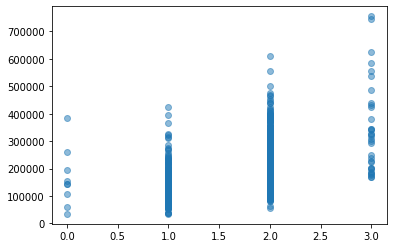

In [ ]:
x = new_sample['FullBath']
y = new_sample['SalePrice']

plt.scatter(x, y,  alpha=0.5)
plt.show()

## Correlation Analysis

In [ ]:
new_sample.corr()

SalePrice  YearBuilt  FullBath  BedroomAbvGr
SalePrice      1.000000   0.522897  0.560664      0.168213
YearBuilt      0.522897   1.000000  0.468271     -0.070651
FullBath       0.560664   0.468271  1.000000      0.363252
BedroomAbvGr   0.168213  -0.070651  0.363252      1.000000

### Correlation matrix with seaborn

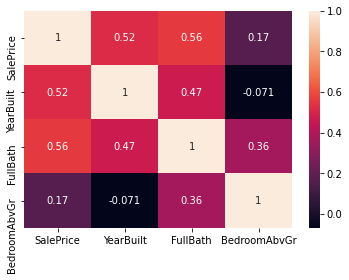

In [ ]:
Var_Corr = new_sample.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [ ]:
def heatMap(df):
    corr = new_sample.corr()
    fig, ax = plt.subplots(figsize=(10, 10))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()

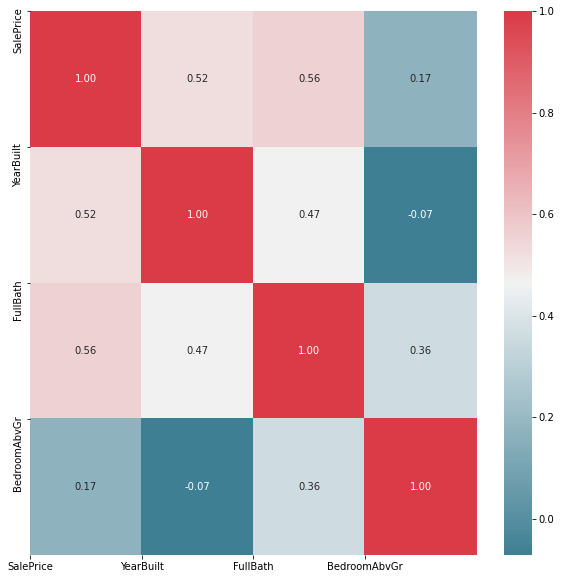

In [ ]:
heatMap(new_sample)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd7c85d550>,
      dtype=object)

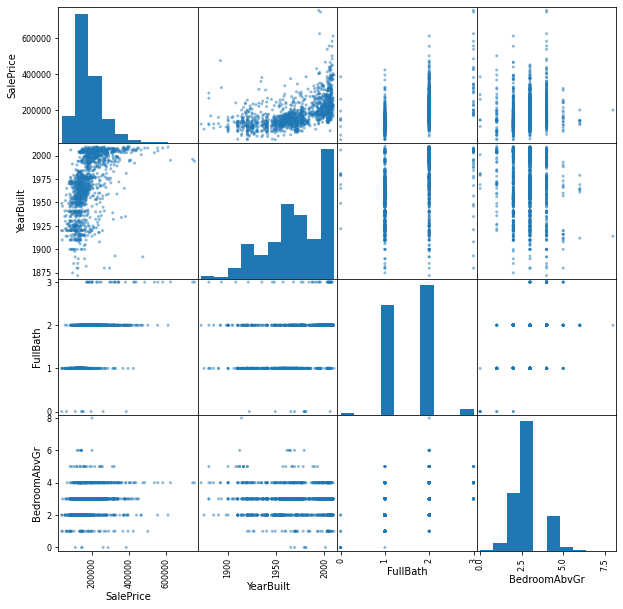

In [ ]:
pd.plotting.scatter_matrix(new_sample, figsize=(10, 10))

## Challenges

In the data folder, there is a csv that contains the file `Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv`. That data is from here: https://catalog.data.gov/dataset/census-data-selected-socioeconomic-indicators-in-chicago-2008-2012-36e55

This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” by Chicago community area, for the years 2008 – 2012. The indicators are the percent of occupied housing units with more than one person per room (i.e., crowded housing); the percent of households living below the federal poverty level; the percent of persons in the labor force over the age of 16 years that are unemployed; the percent of persons over the age of 25 years without a high school diploma; the percent of the population under 18 or over 64 years of age (i.e., dependency); and per capita income. 

### Challenge 1: Load the file into a Pandas dataframe, then print the top 5 rows

Store this dataframe in a variable called `poverty`

### Challenge 2: Find the mean 'PER CAPITA INCOME' and the mean 'PERCENT AGED 16+ UNEMPLOYED' in the dataset as a whole. 

### Challenge 3: Find max, min and mean of 'HARDSHIP INDEX' and return name of 'COMMUNITY AREA NAME'

### Challenge 4: Plot a histogram for 'HARDSHIP INDEX'

### Challenge 5: Create new column 'New HARDSHIP INDEX' by calculating 'HARDSHIP INDEX'/Mean of 'HARDSHIP INDEX'

### Challenge 6: Identify Null values in the data 

### Challenge 7: Subset data into smaller data set, Let's choose 'COMMUNITY AREA NAME', 'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED', 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', 'PER CAPITA INCOME', and 'HARDSHIP INDEX'

### Challenge 8: Using new subset from Challenge 7, create another new subset without 'COMMUNITY AREA NAME' (hint: delete column)

### Challenge 9: using new subset in Challenge 8, plot scatter plot using 'HARDSHIP INDEX' (Y) and 'PER CAPITA INCOME' (X)

### Challenge 10: using new subset in Challenge 8, conduct correlation coefficient table

### Challenge 11: using new subset in Challenge 8, construct Correlation plot (heatmap) using seaborn



## Linear Regression Example


In [ ]:
#subset all independent variables  
import statsmodels.api as sm
indvar = sub_poverty[['PER CAPITA INCOME']]
dvar = sub_poverty[['HARDSHIP INDEX']]
X = indvar
Y = dvar
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(Y, X, missing='drop').fit()
model.summary()